# Feature Engineering

## Возможные проблемы с данными

1. Недостаточное количество данных
2. Нерепрезентативные данные 
3. Данные плохого качества
4. Нерелевантные фичи



In [2]:
# Common imports
import pandas as pd
import numpy as np

## Анализ и визуализация данных

In [3]:
# HOUSING_URL = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz"

housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Null значения
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# categorical значения
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
# разные масштабы
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


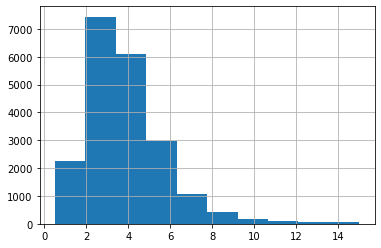

In [7]:
# допустим, мы хотим подготовить median_income для stratified sampling (разбить на категории)
# если мы сделаем это в лоб, то получим и большие, и маленькие категории, что не очень хорошо
housing["median_income"].hist()

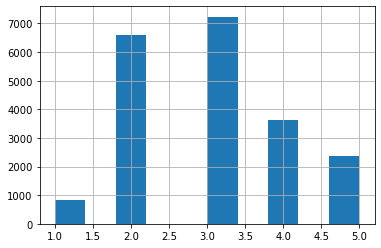

In [8]:
# трансформируем данные
# поделим на 1.5, чтобы уменьшить количество категорий
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# ограничим значения сверху
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing["income_cat"].hist()

## Очистка данных

Большая часть алгоритмов машинного обучения не может работать с null значениями (т.е., мы должны очистить данные от них). Это можно сделать одним из трех способов:
1. Удалить атрибут (столбец), содержащий null значения (жестко)
2. Удалить строки, в которых атрибут равен null (может быть дорого)
3. Заменить null значения на какое-то другое значение (0, mean, median, most popular)

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  income_cat          20640 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.7+ MB


In [11]:
# у total_bedrooms есть null значения, давайте заменим их на mean
# предварительно выкинем из рассмотрения ocean_proximity, так как это categorical атрибут и у него нет mean
from sklearn.impute import SimpleImputer 
housing_num = housing.drop("ocean_proximity", axis=1)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean').fit(housing_num)
imputer.statistics_

array([-1.19569704e+02,  3.56318614e+01,  2.86394864e+01,  2.63576308e+03,
        5.37870553e+02,  1.42547674e+03,  4.99539680e+02,  3.87067100e+00,
        2.06855817e+05,  3.00668605e+00])

In [12]:
housing_num.mean().values

array([-1.19569704e+02,  3.56318614e+01,  2.86394864e+01,  2.63576308e+03,
        5.37870553e+02,  1.42547674e+03,  4.99539680e+02,  3.87067100e+00,
        2.06855817e+05,  3.00668605e+00])

In [13]:
_ = imputer.transform(housing_num)

### Категорийные атрибуты

Не все модели умеют работать с категорийными атрибутами. В зависимости от типа данных, такие атрибуты преобразуются либо в порядковые значения (если мы хотим сохранить зависимость), либо в бинарные фичи.

Например, атрибут "расстояние" со значениями ["близко", "средне", "далеко"] можно преобразовать в тот же атрибут со значениями [0, 1, 2], либо в три новых атрибута "расстояние_близко", "расстояние_средне", "расстояние_далеко" со значениями 1/0.


In [14]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([3, 3, 3, ..., 1, 1, 1])

In [16]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [17]:
pd.get_dummies(housing["ocean_proximity"]).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


## Масштабирование данных

Алгоритмы машинного обучения работают плохо, если у численных атрибутов разные масштабы (почему?). 

**Предсказываемые значения масштабировать не надо.**

Два основных способа масштабирования:
* min-max масштабирование (нормализация)
* стандартизация (отнять среднее, поделить на variance)

In [18]:
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler